In this technique you have to deploy whole dataset in server when you deploy your model.
So, it is not good for large datasets.
It works well for linear dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.shape

(891, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

## For Numeical columns

In [7]:
X = df.drop(columns=['Survived'])

y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [10]:
# Create new column so that "Age" column not change

X_train['Age_imputed'] = X_train['Age']

X_test['Age_imputed'] = X_test['Age']

In [11]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [12]:
# Only show the null index

X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [13]:
X_train['Age'].isnull().sum()

148

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([66.  ,  4.  , 34.  , 19.  , 50.  , 41.  , 28.  , 39.  , 58.  ,
       35.  ,  4.  , 24.  , 39.  , 20.  , 30.  , 40.  , 21.  , 40.  ,
        4.  , 28.  , 41.  ,  9.  , 48.  , 28.  , 25.  , 24.  , 30.  ,
       16.  , 21.  , 22.  , 54.  , 28.  , 24.  , 28.  , 40.  , 45.5 ,
       45.  , 18.  , 23.5 , 36.  , 50.  , 26.  , 27.  , 31.  , 35.  ,
       38.  , 46.  , 29.  , 37.  , 15.  , 19.  , 23.  , 17.  , 24.  ,
       62.  , 18.  , 37.  , 17.  , 20.  , 28.  ,  9.  , 20.  ,  3.  ,
        4.  , 25.  , 29.  , 71.  , 23.  ,  4.  , 27.  , 28.  , 57.  ,
       33.  , 25.  , 50.  , 22.  , 38.  , 29.  , 33.  , 51.  , 19.  ,
       29.  , 24.  ,  4.  ,  0.67, 16.  , 30.  , 36.  , 23.  , 34.  ,
        0.83, 51.  , 52.  , 33.  , 34.5 , 36.  ,  4.  , 15.  , 40.  ,
       30.  ,  6.  , 42.  , 29.  , 34.  , 25.  , 29.  , 47.  , 25.  ,
       61.  , 20.  , 45.  , 21.  , 23.  , 40.  , 42.  , 11.  , 33.  ,
       28.  , 56.  , 41.  , 29.  , 32.5 , 32.  , 24.  , 32.  , 14.5 ,
       31.  ,  1.  ,

In [15]:
# Here, we fill missing value in randomly
# X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values --> means that
# we take randomly value from "Age" column for those rows contain value.
# And we take value at the same number of missing values

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [16]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,39.0
493,71.0,49.5042,71.0
527,NaN,221.7792,60.0


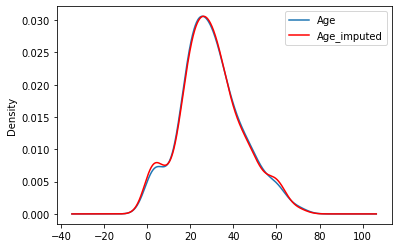

In [17]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_imputed'].plot(kind='kde', ax=ax, color="red")

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc="best")

plt.show()

In [18]:
print('Original variable variance: ', X_train['Age'].var())

print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  210.1450316874477


In [19]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,65.270771
Age,71.512440,204.349513,204.349513
Age_imputed,65.270771,204.349513,210.145032


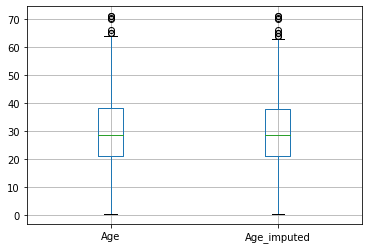

In [20]:
X_train[['Age', 'Age_imputed']].boxplot()
plt.show()

In [21]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
# sampled_value

## For Categorical columns

In [22]:
data = pd.read_csv('datasets/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [23]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [25]:
data.shape

(1460, 3)

In [26]:
X = data
y = data['SalePrice']

In [27]:
X

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
X_train['GarageQual_imputed'] = X_train.loc[:, 'GarageQual']
X_test['GarageQual_imputed'] = X_test.loc[:, 'GarageQual']

X_train['FireplaceQu_imputed'] = X_train.loc[:, 'FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test.loc[:, 'FireplaceQu']

In [30]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1045,Gd,TA,139600,TA,Gd
222,TA,TA,179900,TA,TA
1318,TA,TA,275000,TA,TA
639,Gd,TA,264561,TA,Gd
266,TA,TA,185000,TA,TA


In [31]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\alami\AppData\Local\Temp\ipykernel_6836\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\alami\AppData\Local\Temp\ipykernel_6836\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\alami\AppData\Local\Temp\ipykernel_6836\856878696.py:4: SettingWithCopyWarning: 
A value

In [32]:
# Show the frequency before and after imputation

temp = pd.concat(objs=
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [33]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [34]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.538721
Fa,0.040917,0.054994
Po,0.027823,0.035915
Ex,0.024550,0.030303


In [35]:
category = X_train['FireplaceQu'].dropna().unique()
category

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [36]:
X_train['FireplaceQu'].dropna().nunique()

5

In [37]:
# for category in X_train['FireplaceQu'].dropna().unique():
#     sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
# plt.show()

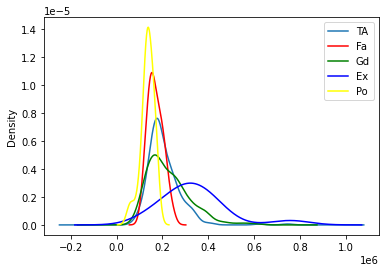

In [38]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train[X_train['FireplaceQu'] == "TA"]['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu'] == "Fa"]['SalePrice'].plot(kind='kde', ax=ax, color="red")
X_train[X_train['FireplaceQu'] == "Gd"]['SalePrice'].plot(kind='kde', ax=ax, color="green")
X_train[X_train['FireplaceQu'] == "Ex"]['SalePrice'].plot(kind='kde', ax=ax, color="blue")
X_train[X_train['FireplaceQu'] == "Po"]['SalePrice'].plot(kind='kde', ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()

labels = category

ax.legend(lines, labels, loc="best")

plt.show()
    

In [39]:
X_train['FireplaceQu_imputed'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

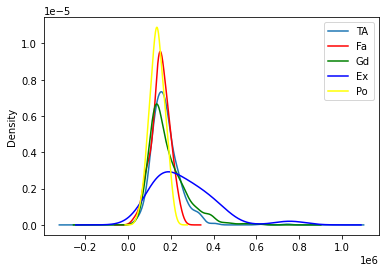

In [40]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train[X_train['FireplaceQu_imputed'] == "TA"]['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu_imputed'] == "Fa"]['SalePrice'].plot(kind='kde', ax=ax, color="red")
X_train[X_train['FireplaceQu_imputed'] == "Gd"]['SalePrice'].plot(kind='kde', ax=ax, color="green")
X_train[X_train['FireplaceQu_imputed'] == "Ex"]['SalePrice'].plot(kind='kde', ax=ax, color="blue")
X_train[X_train['FireplaceQu_imputed'] == "Po"]['SalePrice'].plot(kind='kde', ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()

labels = category

ax.legend(lines, labels, loc="best")

plt.show()